# SIR Model with Time Dependent Parameters

### Small numerical example

In [1]:
N = 3e6
I0 = 10
S0 = N - I0
R0 = 0
lam = 3
p = 0.05
beta = 0.15
gamma = 0.1

S1 = S0 - beta*I0*S0/N
I1 = I0 + (beta*I0*S0)/N - gamma*I0
R1 = R0 + gamma*I0

print(S0,I0,R0)
print(S1,I1,R1)

2999990.0 10 0
2999988.500005 10.499995 1.0


### Setting Up Packages

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Set Input Parameters

In [3]:
# lambda: number of people that a infectious person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
lam, p, gamma = 3, 0.05, 1./14

# beta: number of people that an infectious person can transmit virus to (not infect) within a single time period
beta = lam * p

print(beta)

0.15000000000000002


In [4]:
# Total population.
N_total = 330000000

N = N_total

# A grid of time points (in days) for the detecting period
t = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
# Note: here R0 denotes the number of recovered people at time 0; not the disease reproductive number R_0 (R_naught)
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

### Model Engine

In [5]:
# The SIR model differential equations.
# Input: the current system state (S, I, R), t, and parameters
# Output: changes in system state
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Generate Trajectories for S(t), I(t), R(t)

In [6]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Here outputs S,I,R are trajectories over the simulation time horizon, 
# i.e., S is a vector of the numbers of susceptible people at each time step, check by printing it out:
#print S

In [7]:
print(ret.shape)

(366, 3)


### Plot Trajectories for S(t), I(t), R(t)

<ipython-input-8-4aef9d7ed58e>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


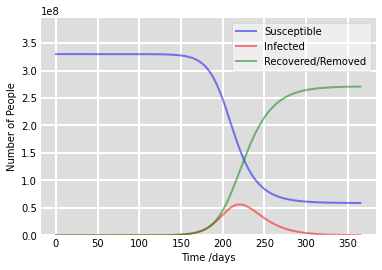

In [8]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0,N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Time Dependent  R_0

In [9]:
L_shutdown = 60 # The day that R_naught changed
L_relax = 100 # The day that restrictions are relaxed

In [10]:
# The SIR model differential equations.
# The only difference frmo the previous version, is that now beta is time dependent
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Text(0, 0.5, 'Beta(t)')

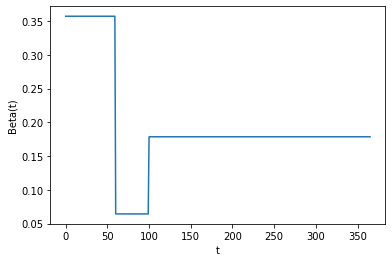

In [11]:
def beta_dynamic(t):
    value = 1.0 * gamma
    if t < L_shutdown:
        value = 5.0 * gamma
    elif t < L_relax:
        value = 0.9 * gamma
    else:
        value = 2.5 * gamma
    return value

plt.figure()
plt.plot(t,[beta_dynamic(t_dot) for t_dot in t])
plt.xlabel('t')
plt.ylabel('Beta(t)')

In [12]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t, args=(N, beta_dynamic, gamma))
S, I, R = ret.T

<ipython-input-13-1920dd83da77>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


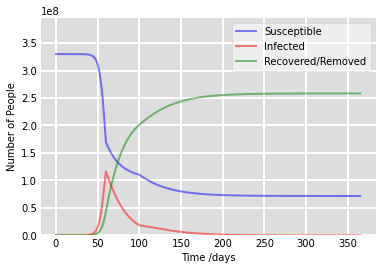

In [13]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0, N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

<ipython-input-14-4aef9d7ed58e>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


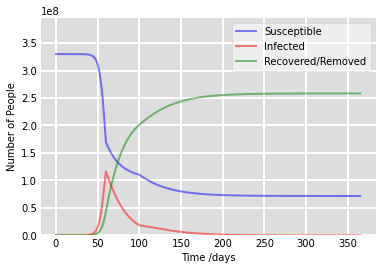

In [14]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0,N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## Smooth R_0 transition

Now we design a smoother transition for the basic reproduction number

$$R_0(t) = \frac{R_0^{start} - R_0^{end}}{1 + e^{-k(-x+x_0)}} + R_0^{end}$$

Here R_0^{start} and R_0^{end} are the starting and ending $R_0$ values that we want to interpolate between. 

$x_0$ is the inflection point of the transition, i.e., the day that $R_0$ changes most dramatically. You can interpret is the main lockdown day.

$k$ describes how fast R_0 change. Larger $k$ means faster change.

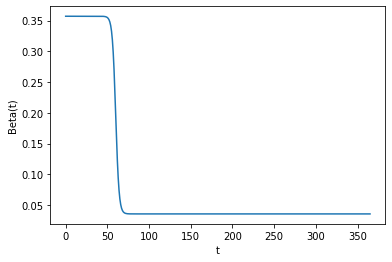

In [15]:
R_0_start, k, x0, R_0_end = 5.0, 0.5, 60, 0.5

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def logistic_beta(t):
    return ((R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end) * gamma

plt.figure()
plt.plot(t,[logistic_beta(t_dot) for t_dot in t])
plt.xlabel('t')
plt.ylabel('Beta(t)')

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_dynamic, y0, t, args=(N, logistic_beta, gamma))
S, I, R = ret.T

<ipython-input-16-1920dd83da77>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


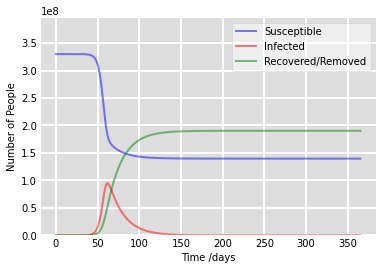

In [16]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of People')
ax.set_ylim(0, N_total * 1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Fit Model to Data

In [17]:
from scipy import integrate, optimize

Text(0, 0.5, 'Observed I(t) / N')

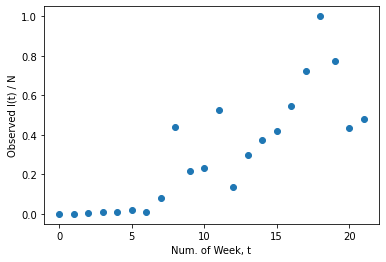

In [18]:
# Observed active case as a percentage of population (each time period is a week)
y_total = [0.0, 0.0010131712259371835, 0.0035460992907801418, 0.00911854103343465,
        0.008611955420466059, 0.021783181357649443, 0.00911854103343465, 0.07852077001013172, 0.4397163120567376, 
        0.21681864235055726, 0.232016210739615, 0.5278622087132725, 0.13576494427558258, 0.2988855116514691, 0.37436676798378926, 
        0.4209726443768997, 0.544579533941236, 0.7254305977710233, 1.0, 0.7740628166160081, 0.43617021276595747, 0.48226950354609927]
    
x_total = range(0,22) # week 0 to 22. x is the week number.

plt.figure()
plt.scatter(x_total, y_total)
plt.xlabel('Num. of Week, t')
plt.ylabel('Observed I(t) / N')

### Static R_0

In [19]:
ydata = np.array(y_total, dtype=float) * N
xdata = np.array(x_total, dtype=float)

# Returns the active case counts over time
def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1] # returning I(t)

# popt - calculated optimal parameter values that can minimize the sum of squared errors
popt, pcov = optimize.curve_fit(fit_odeint, 
                                xdata, 
                                ydata, 
                                (0.3,1/14,0.05*N))

/Users/hh1915/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [20]:
fitted = fit_odeint(xdata, *popt)

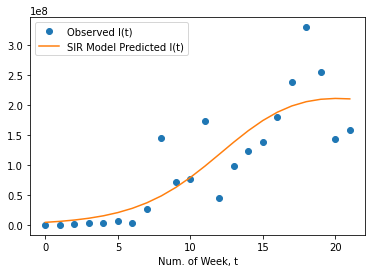

In [21]:
plt.plot(xdata, ydata, 'o', label='Observed I(t)')
plt.plot(xdata, fitted, label='SIR Model Predicted I(t)')
plt.xlabel('Num. of Week, t')
plt.legend()
plt.show()


### Dynamic R_0: With Lock Down Policy Implemented

In [79]:
ydata = np.array(y_total, dtype=float) * N
xdata = np.array(x_total, dtype=float)

# First-case in the Country: March 6th, 2020
L_shutdown = 4 # Full Lock Down in PA: April 1, 2020
L_relax = 9   # Countinuous Reopen in PA: May 8, 2020

def deriv_dynamic(y, t, N, beta1, beta2, beta3, gamma):
    S, I, R = y
    beta = 1.0 * gamma
    if t < L_shutdown:
        beta = beta1
    elif t < L_relax:
        beta = beta2
    else:
        beta = beta3
    
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def beta_dynamic(t):
    value = 1.0 * gamma
    if t < L_shutdown:
        value = 5.0 * gamma
    elif t < L_relax:
        value = 0.9 * gamma
    else:
        value = 2.5 * gamma
    return value

def fit_dynamic_odeint(x, beta1, beta2, beta3, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv_dynamic, (S0, I0, R0), x, args=(N, beta1, beta2, beta3, gamma))[:,1] # returning I(t)

popt, pcov = optimize.curve_fit(fit_dynamic_odeint, # Model 
                                xdata, # data
                                ydata, # data
                                (0.356,0.060,0.179,1/14,0.05*N)
                               ) # non-convex optimiation multiple local minimums


In [82]:
fitted = fit_dynamic_odeint(xdata, *popt)

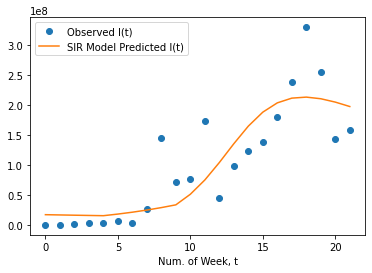

In [83]:
plt.plot(xdata, ydata, 'o', label='Observed I(t)')
plt.plot(xdata, fitted, label='SIR Model Predicted I(t)')
plt.xlabel('Num. of Week, t')
plt.legend()
plt.show()
